## Exploratory Data Analysis

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('yahoo_data.xlsx',engine='openpyxl')
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [3]:
df.rename(columns={
    'Date':'date',
    'Open':'open',
    'High':'high',
    'Low':'low',
    'Close*':'close',
    'Adj Close**':'adj_close',
    'Volume':'volume'
}, inplace=True)
df.head()

,date,open,high,low,close,adj_close,volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [4]:
# converting date to datetime
# df['datetime'] = pd.to_datetime(df['date'])
df.insert(0, 'datetime', pd.to_datetime(df['date']))
df.head()

,datetime,date,open,high,low,close,adj_close,volume
0,2023-04-28,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,2023-04-27,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,2023-04-26,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,2023-04-25,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,2023-04-24,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [5]:
df.pop('date')

0       Apr 28, 2023
1       Apr 27, 2023
2       Apr 26, 2023
3       Apr 25, 2023
4       Apr 24, 2023
            ...     
1253    May 07, 2018
1254    May 04, 2018
1255    May 03, 2018
1256    May 02, 2018
1257    May 01, 2018
Name: date, Length: 1258, dtype: object

In [7]:
df.head()

,datetime,open,high,low,close,adj_close,volume
0,2023-04-28,33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000


### What is the total number of observations and features in the dataset?

In [8]:
features = df.shape[1]
features

7

In [9]:
observartions = df.shape[0]
observartions

1258

### Are there any missing values or duplicate rows?


In [ ]:
na_rows = df.isna().sum()
na_rows # no null values

datetime     0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [ ]:
# duplicate rows
df.duplicated().sum() # none

np.int64(0)

### Is the Date column properly formatted and sorted chronologically?

In [19]:
df['datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1258 entries, 0 to 1257
Series name: datetime
Non-Null Count  Dtype         
--------------  -----         
1258 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 10.0 KB


In [ ]:
df['datetime'].is_monotonic_increasing # not sorted

False

In [22]:
# hence sorting it
df = df.sort_values(by = 'datetime').reset_index(drop = True)

In [ ]:
df['datetime'].is_monotonic_increasing # now its sorted

True

### What is the overall time span covered by the dataset?

In [25]:
df['datetime'].min(), df['datetime'].max() 

(Timestamp('2018-05-01 00:00:00'), Timestamp('2023-04-28 00:00:00'))

In [ ]:
days_diff = (df['datetime'].max() - df['datetime'].min())
print(days_diff) # span of 5 years

1823 days 00:00:00


### What are the mean, median, standard deviation, min, and max for Open, High, Low, Close, and Volume?

In [35]:
df[['open','close','high','low','volume']].describe().T

,count,mean,std,min,25%,50%,75%,max
open,1258.0,2.959582e+04,4.006078e+03,19028.36,2.604127e+04,2.920141e+04,3.360403e+04,3.672260e+04
close,1258.0,2.959936e+04,4.007469e+03,18591.93,2.602712e+04,2.919946e+04,3.360034e+04,3.679965e+04
high,1258.0,2.977695e+04,4.009008e+03,19121.01,2.616315e+04,2.933568e+04,3.382544e+04,3.695265e+04
low,1258.0,2.940243e+04,4.004949e+03,18213.65,2.587787e+04,2.899650e+04,3.334683e+04,3.663600e+04
volume,1258.0,3.450636e+08,1.069142e+08,86150000.00,2.773125e+08,3.247250e+08,3.875100e+08,9.159900e+08


### What is the distribution shape of Close prices? Is it skewed?

In [ ]:
print(df['close'].mean())
print(df['close'].median())
print(df['close'].mode()[0])
print('SKEWNESS: ',df['close'].skew()) # positively skewed or symmetric

29599.361677265504
29199.46
27691.49
SKEWNESS:  0.013838116546110085


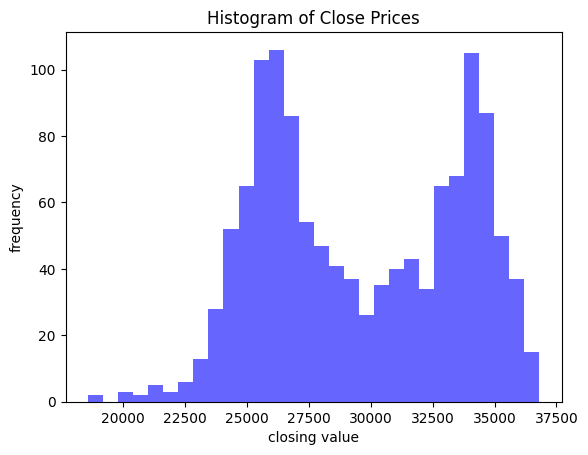

In [48]:
# histogram of the same
plt.hist(df['close'], color = 'blue', alpha = 0.6, bins = 30)
plt.xlabel('closing value')
plt.ylabel('frequency')
plt.title("Histogram of Close Prices")
plt.show()

### What is the distribution of Volume?

345063624.80127186
324725000.0
301750000
Skewness:  1.758784809456603


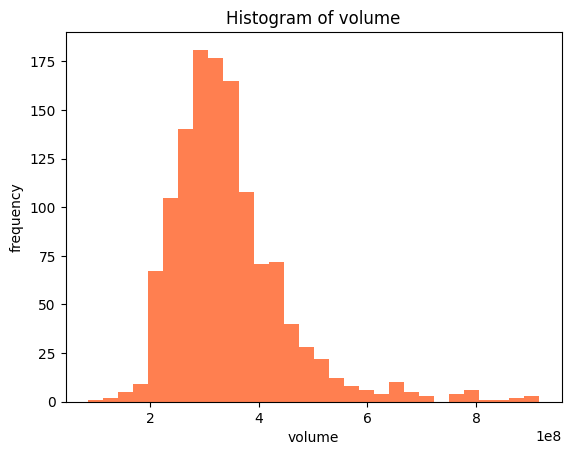

In [ ]:
print(df['volume'].mean())
print(df['volume'].median())
print(df['volume'].mode()[0])
print('Skewness: ',df['volume'].skew()) # positive skewness
 
plt.hist(df['volume'], bins = 30, color = 'coral')
plt.xlabel('volume')
plt.ylabel('frequency')
plt.title("Histogram of volume")
plt.show()

### What is the daily price range (High − Low), and how volatile is it on average?

In [51]:
df['daily_price'] = df['high'] - df['low']

In [52]:
df.head()

,datetime,open,high,low,close,adj_close,volume,daily_price
0,2018-05-01,24117.29,24117.29,23808.19,24099.05,24099.05,380070000,309.10
1,2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000,299.22
2,2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000,464.84
3,2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000,554.48
4,2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000,216.03


In [55]:
print(df['daily_price'].mean())
print(df['daily_price'].median())
print(df['daily_price'].std())

374.5135135135135
308.1949999999997
240.61871216902327


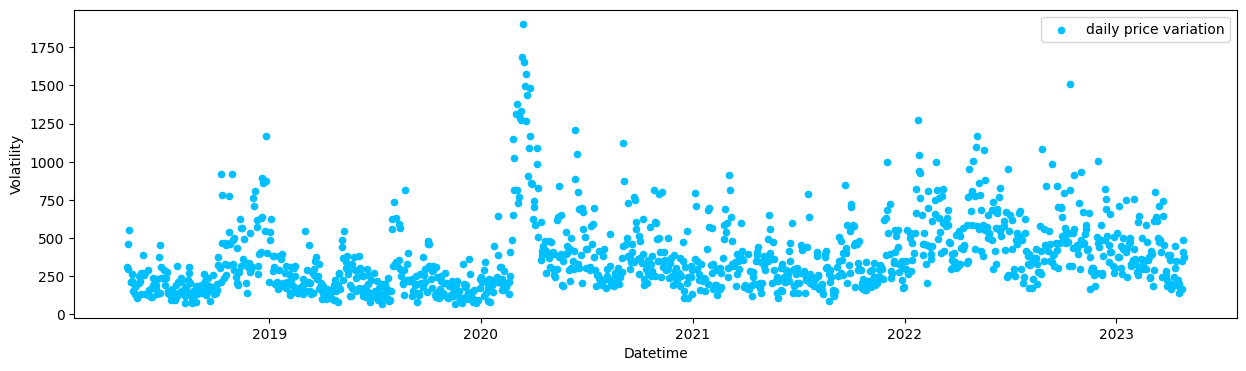

In [65]:
plt.figure(figsize=(15,4))
plt.scatter(df['datetime'], df['daily_price'], color = 'deepskyblue', label = 'daily price variation', s = 20)
plt.xlabel('Datetime')
plt.ylabel('Volatility')
plt.legend()
plt.show()

### Compute the correlation matrix. Which variable is most correlated with Close?


In [74]:
df.columns

Index(['datetime', 'open', 'high', 'low', 'close', 'adj_close', 'volume',
       'daily_price'],
      dtype='object')

In [75]:
correlation_matrix = df[['open', 'high', 'low', 'close', 'adj_close', 'volume','daily_price']].corr()
correlation_matrix

,open,high,low,close,adj_close,volume,daily_price
open,1.000000,0.999043,0.998626,0.997592,0.997592,-0.088002,0.023783
high,0.999043,1.000000,0.998198,0.998682,0.998682,-0.073388,0.046868
low,0.998626,0.998198,1.000000,0.998839,0.998839,-0.115077,-0.013165
close,0.997592,0.998682,0.998839,1.000000,1.000000,-0.096766,0.014230
adj_close,0.997592,0.998682,0.998839,1.000000,1.000000,-0.096766,0.014230
volume,-0.088002,-0.073388,-0.115077,-0.096766,-0.096766,1.000000,0.692647
daily_price,0.023783,0.046868,-0.013165,0.014230,0.014230,0.692647,1.000000


In [ ]:
# wrt close
correlation_matrix['close'].sort_values(ascending = False) # adj_close and low have highest correlation to close

close          1.000000
adj_close      1.000000
low            0.998839
high           0.998682
open           0.997592
daily_price    0.014230
volume        -0.096766
Name: close, dtype: float64

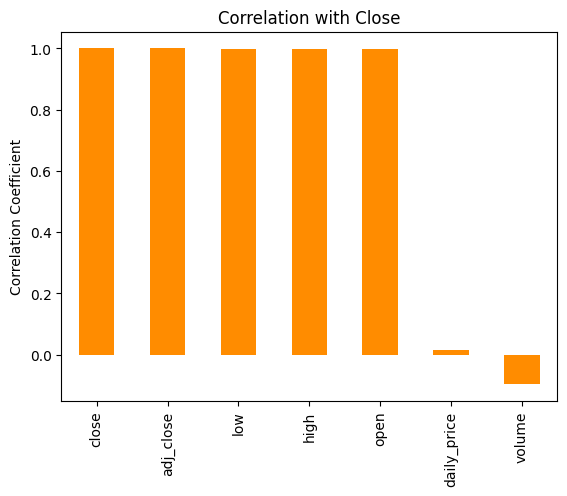

In [91]:
correlation_matrix['close'].sort_values(ascending = False).plot(kind = 'bar', color = 'darkorange')

plt.title("Correlation with Close")
plt.ylabel("Correlation Coefficient")
#plt.xticks(rotation=45)
plt.show()

### Is there strong multicollinearity among Open, High, and Low?

In [88]:
df[['open','high','low']].corr()

,open,high,low
open,1.000000,0.999043,0.998626
high,0.999043,1.000000,0.998198
low,0.998626,0.998198,1.000000


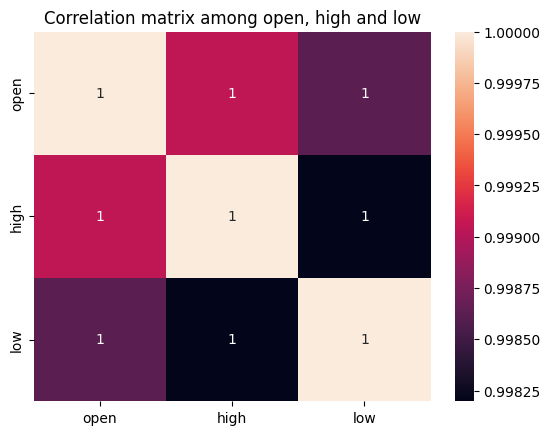

In [ ]:
sns.heatmap(df[['open','high','low']].corr(), annot = True, cmap = 'rocket')
plt.title('Correlation matrix among open, high and low')
plt.show() # all these have a highest correlation

### Create Daily Return. What is its mean and variance?

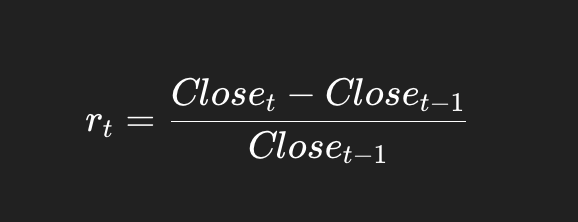

In [93]:
df['daily_return'] = df['close'].pct_change()
df.head()

,datetime,open,high,low,close,adj_close,volume,daily_price,daily_return
0,2018-05-01,24117.29,24117.29,23808.19,24099.05,24099.05,380070000,309.10,NaN
1,2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000,299.22,-0.007223
2,2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000,464.84,0.000216
3,2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000,554.48,0.013889
4,2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000,216.03,0.003908


In [97]:
# handling the first nan value
df.fillna(df['daily_return'].mean(),inplace=True)
df.head()

,datetime,open,high,low,close,adj_close,volume,daily_price,daily_return
0,2018-05-01,24117.29,24117.29,23808.19,24099.05,24099.05,380070000,309.10,0.000368
1,2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000,299.22,-0.007223
2,2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000,464.84,0.000216
3,2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000,554.48,0.013889
4,2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000,216.03,0.003908


In [99]:
print(df['daily_return'].mean())
print(df['daily_return'].var())

0.0003677754655200348
0.00018212680223264735


### Is Daily Return stationary compared to Close?

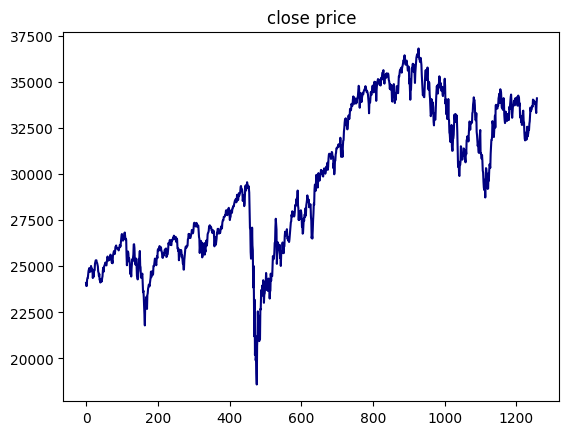

In [103]:
plt.plot(df['close'], color = 'navy')
plt.title('close price')
plt.show()

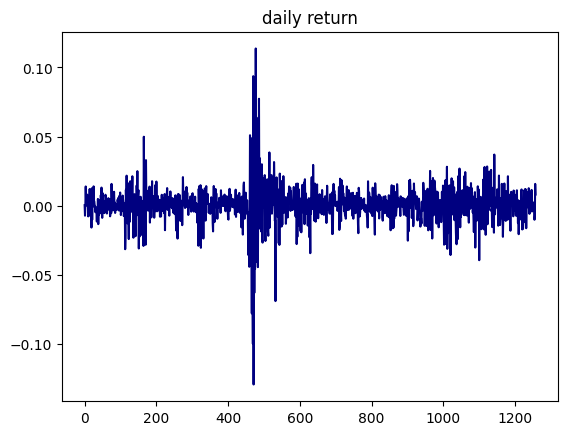

In [106]:
plt.plot(df['daily_return'], color = 'navy')
plt.title('daily return')
plt.show() # more stationary

### Does Volume correlate with Daily Return?

In [ ]:
df[['volume','daily_return']].corr() # negatively correlates, with less internsity

,volume,daily_return
volume,1.000000,-0.120333
daily_return,-0.120333,1.000000
